##  Mapping using matplolib & YOLOv8

### Packages

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
from PIL import Image

### Load the model

In [43]:
model = YOLO('yolov8n.pt')

In [44]:
def capture_image():
    """
    Captures an image using the default camera and saves it as 'tomb_image.jpg'.
    
    Returns:
        str: The file path of the captured image if successful.
        None: If the image capture fails.
    """
    camera = cv2.VideoCapture(0)
    ret, frame = camera.read()
    if not ret:
        print("Failed to capture image")
        return None
    cv2.imwrite('tomb_image.jpg', frame)
    camera.release()
    return 'tomb_image.jpg'

In [45]:
def process_image(image_path):
    """
    Processes the captured image to detect objects and draw bounding boxes around them.
    
    Args:
        image_path (str): The file path of the image to process.
    
    Returns:
        dict: A dictionary containing item positions with item names as keys and lists of (x, y, w, h) tuples as values.
    """
    image = cv2.imread(image_path)
    results = model(image)

    item_positions = {}
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  
        confidences = result.boxes.conf.cpu().numpy()  
        classes = result.boxes.cls.cpu().numpy()  

        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes[i]
            confidence = confidences[i]
            class_id = classes[i]

            x, y, w, h = int(x1), int(y1), int(x2 - x1), int(y2 - y1)
            class_name = model.names[int(class_id)]

            if class_name not in item_positions:
                item_positions[class_name] = []
            item_positions[class_name].append((x, y, w, h))

            # Draw bounding box on image
            color = (0, 255, 0) if class_name == 'Pharaoh Coffin' else (255, 0, 0) if class_name == 'Pharaoh Treasure' else (0, 0, 255)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    cv2.imwrite('processed_tomb_image.jpg', image)
    return item_positions

In [46]:
def generate_map(item_positions, image_shape):
    """
    Generates a visual map of the identified items and their positions in the image.
    
    Args:
        item_positions (dict): A dictionary of item positions.
        image_shape (tuple): The shape of the image (height, width, channels).
    
    Returns:
        None
    """
    fig, ax = plt.subplots()
    ax.set_xlim(0, image_shape[1])
    ax.set_ylim(0, image_shape[0])
    ax.invert_yaxis()  # Invert y-axis to match the image coordinate system (top-left is (0, 0))
    
    ax.set_facecolor((127/255, 205/255, 255/255))  

    for item, positions in item_positions.items():
        for pos in positions:
            rect = patches.Rectangle((pos[0], pos[1]), pos[2], pos[3], edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(pos[0], pos[1], item, color='r', fontsize=8)

    plt.savefig('tomb_map.png')
    plt.show()


0: 480x640 1 person, 1 cell phone, 15.0ms
Speed: 3.0ms preprocess, 15.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)
Identified Item Positions: {'person': [(2, 140, 589, 339)], 'cell phone': [(366, 183, 131, 276)]}


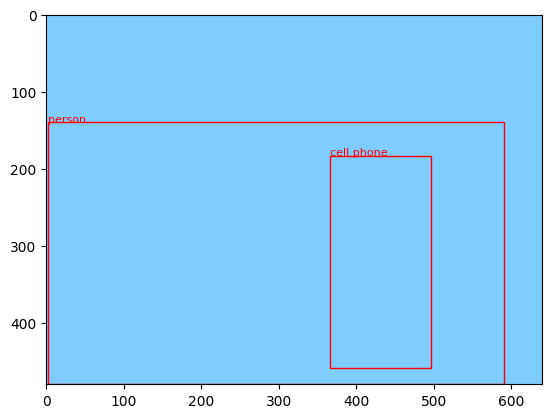

In [52]:
def main():
    """
    Main function to capture an image, process it to identify items, and generate a visual map.
    
    Returns:
        None
    """
    image_path = capture_image()
    if image_path:
        item_positions = process_image(image_path)
        print("Identified Item Positions:", item_positions)
        image = cv2.imread(image_path)
        generate_map(item_positions, image.shape)
        
if __name__ == "__main__":
    main()

## Mapping using Pygame & YOLOv8

In [20]:
import cv2
import numpy as np
import pygame
from ultralytics import YOLO

In [21]:
model = YOLO('yolov8n.pt')

def capture_image():
    """
    Captures an image using the default camera and saves it as 'tomb_image.jpg'.
    
    Returns:
        str: The file path of the captured image if successful.
        None: If the image capture fails.
    """
    camera = cv2.VideoCapture(0)
    ret, frame = camera.read()
    if not ret:
        print("Failed to capture image")
        return None
    cv2.imwrite('tomb_image.jpg', frame)
    camera.release()
    return 'tomb_image.jpg'

In [22]:
def process_image(image_path):
    """
    Processes the captured image to detect objects and draw bounding boxes around them.
    
    Args:
        image_path (str): The file path of the image to process.
    
    Returns:
        dict: A dictionary containing item positions with item names as keys and lists of (x, y, w, h) tuples as values.
    """
    image = cv2.imread(image_path)
    results = model(image)

    item_positions = {}
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  
        confidences = result.boxes.conf.cpu().numpy()  
        classes = result.boxes.cls.cpu().numpy() 

        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes[i]
            confidence = confidences[i]
            class_id = classes[i]

            x, y, w, h = int(x1), int(y1), int(x2 - x1), int(y2 - y1)
            class_name = model.names[int(class_id)]

            if class_name not in item_positions:
                item_positions[class_name] = []
            item_positions[class_name].append((x, y, w, h))

            # Draw bounding box on image
            color = (0, 255, 0) if class_name == 'Pharaoh Coffin' else (255, 0, 0) if class_name == 'Pharaoh Treasure' else (0, 0, 255)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    cv2.imwrite('processed_tomb_image.jpg', image)
    return item_positions

In [23]:
def generate_map(item_positions, image_shape):
    """
    Generates a visual map of the identified items and their positions in the image using Pygame.
    
    Args:
        item_positions (dict): A dictionary of item positions.
        image_shape (tuple): The shape of the image (height, width, channels).
    
    Returns:
        None
    """
    pygame.init()
    screen = pygame.display.set_mode((image_shape[1], image_shape[0]))
    pygame.display.set_caption('Tomb Map')

    # Fill background
    screen.fill((255, 255, 255))

    # Draw the items
    for item, positions in item_positions.items():
        color = (0, 255, 0) if item == 'Pharaoh Coffin' else (255, 0, 0) if item == 'Pharaoh Treasure' else (0, 0, 255)
        for pos in positions:
            pygame.draw.rect(screen, color, pygame.Rect(pos[0], pos[1], pos[2], pos[3]), 2)
            font = pygame.font.SysFont(None, 24)
            img = font.render(item, True, color)
            screen.blit(img, (pos[0], pos[1] - 20))

    pygame.display.flip()

    # Save the map
    pygame.image.save(screen, 'tomb_map.png')

    # Keep the window open for a while to view the map
    running = True
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

    pygame.quit()


In [24]:
def main():
    image_path = capture_image()
    if image_path:
        item_positions = process_image(image_path)
        print("Identified Item Positions:", item_positions)
        image = cv2.imread(image_path)
        generate_map(item_positions, image.shape)

if __name__ == "__main__":
    main()


0: 480x640 1 person, 1 cat, 15.0ms
Speed: 7.0ms preprocess, 15.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Identified Item Positions: {'person': [(32, 79, 589, 399)], 'cat': [(0, 382, 48, 77)]}


## Manual contour-based detection

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def capture_image():
    camera = cv2.VideoCapture(0)
    ret, frame = camera.read()
    if not ret:
        print("Failed to capture image")
        return None
    cv2.imwrite('tomb_image.jpg', frame)
    camera.release()
    return 'tomb_image.jpg'

In [16]:
def process_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    item_positions = {}
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        
        # Check for the Pharaoh Coffin (Cuboid)
        if aspect_ratio > 1.5:
            item_positions['Pharaoh Coffin'] = (x, y, w, h)
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Check for the Pharaoh Treasure (Cubic)
        elif 0.9 <= aspect_ratio <= 1.1:
            item_positions['Pharaoh Treasure'] = (x, y, w, h)
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Check for the Papyrus Paper Rolls (PVC Pipes)
        elif 0.1 <= aspect_ratio <= 0.2 and h > 15:
            if 'Papyrus Paper Rolls' not in item_positions:
                item_positions['Papyrus Paper Rolls'] = []
            item_positions['Papyrus Paper Rolls'].append((x, y, w, h))
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)

    cv2.imwrite('processed_tomb_image.jpg', image)
    return item_positions

In [17]:
def generate_map(item_positions, image_shape):
    fig, ax = plt.subplots()
    ax.set_xlim(0, image_shape[1])
    ax.set_ylim(0, image_shape[0])
    ax.invert_yaxis()  # Invert y-axis to match image coordinate system

    for item, position in item_positions.items():
        if item == 'Papyrus Paper Rolls':
            for pos in position:
                rect = plt.Rectangle((pos[0], pos[1]), pos[2], pos[3], edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                ax.text(pos[0], pos[1], item, color='r', fontsize=8)
        else:
            rect = plt.Rectangle((position[0], position[1]), position[2], position[3], edgecolor='b', facecolor='none')
            ax.add_patch(rect)
            ax.text(position[0], position[1], item, color='b', fontsize=8)

    plt.savefig('tomb_map.png')
    plt.show()

Identified Item Positions: {'Pharaoh Coffin': (222, 57, 2, 1), 'Pharaoh Treasure': (226, 0, 2, 2), 'Papyrus Paper Rolls': [(218, 13, 5, 30), (283, 0, 4, 26)]}


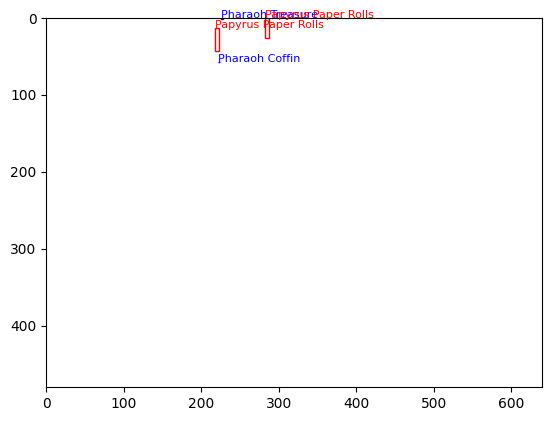

In [18]:
def main():
    image_path = capture_image()
    if image_path:
        item_positions = process_image(image_path)
        print("Identified Item Positions:", item_positions)
        image = cv2.imread(image_path)
        generate_map(item_positions, image.shape)

if __name__ == "__main__":
    main()

## Manaul Pygame

In [5]:
import pygame
import sys

# Initialize pygame
pygame.init()

# Set up display
width, height = 650, 350
map_width, map_height = 400, 200
door_width = 200
door_height = 50
map_x, map_y = 50, 50  # Adjusted map position
window = pygame.display.set_mode((width, height))
pygame.display.set_caption('Underwater Tomb Mapping')

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
BLUE = (0, 0, 255)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
YELLOW = (255, 255, 0)

# Define item positions
item_positions = {'coffin': None, 'treasure': None, 'roll1': None, 'roll2': None}

# Define buttons
buttons = {
    'coffin': pygame.Rect(500, 50, 120, 50),  
    'treasure': pygame.Rect(500, 120, 120, 50),  
    'roll1': pygame.Rect(500, 190, 120, 50),  
    'roll2': pygame.Rect(500, 260, 120, 50),  
}

selected_item = None

# Fonts
font = pygame.font.SysFont(None, 36)

# Function to draw a cuboid (coffin)
def draw_cuboid(surface, x, y, width=100, height=25, depth=20):
    pygame.draw.rect(surface, BLUE, (x, y, width, height))  # Front face
    pygame.draw.polygon(surface, BLUE, [(x, y), (x + depth, y - depth), (x + width + depth, y - depth), (x + width, y)])  # Top face
    pygame.draw.polygon(surface, BLUE, [(x + width, y), (x + width + depth, y - depth), (x + width + depth, y + height - depth), (x + width, y + height)])  # Side face

# Function to draw a cube (treasure)
def draw_cube(surface, x, y, size=40):
    pygame.draw.rect(surface, RED, (x, y, size, size))  # Front face
    pygame.draw.polygon(surface, RED, [(x, y), (x + size / 2, y - size / 2), (x + size + size / 2, y - size / 2), (x + size, y)])  # Top face
    pygame.draw.polygon(surface, RED, [(x + size, y), (x + size + size / 2, y - size / 2), (x + size + size / 2, y + size - size / 2), (x + size, y + size)])  # Side face

# Function to draw a circle (papyrus roll)
def draw_circle(surface, x, y, radius=15):
    pygame.draw.circle(surface, GREEN, (x + radius, y + radius), radius)

# Main loop
running = True
while running:
    window.fill(WHITE)

    # Draw the map area (excluding the door area)
    pygame.draw.line(window, BLACK, (map_x, map_y), (map_x + map_width, map_y), 2)  # Top border
    pygame.draw.line(window, BLACK, (map_x, map_y), (map_x, map_y + map_height), 2)  # Left border
    pygame.draw.line(window, BLACK, (map_x + map_width, map_y), (map_x + map_width, map_y + map_height), 2)  # Right border
    pygame.draw.line(window, BLACK, (map_x, map_y + map_height), (map_x + map_width - door_width, map_y + map_height), 2)  # Bottom border left part

    # Draw the items
    for item, pos in item_positions.items():
        if pos:
            if item == 'coffin':
                draw_cuboid(window, pos[0], pos[1])
            elif item == 'treasure':
                draw_cube(window, pos[0], pos[1])
            elif item == 'roll1' or item == 'roll2':
                draw_circle(window, pos[0], pos[1])

    # Draw buttons
    for item, rect in buttons.items():
        pygame.draw.rect(window, GREEN if item == selected_item else RED, rect)
        text = font.render(item.capitalize(), True, BLACK)
        window.blit(text, (rect.x + 10, rect.y + 10))

    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pos = pygame.mouse.get_pos()

            # Check button clicks
            for item, rect in buttons.items():
                if rect.collidepoint(pos):
                    selected_item = item
                    break
            else:
                # Place item on the map
                if selected_item:
                    if (map_x <= pos[0] <= map_x + map_width and map_y <= pos[1] <= map_y + map_height) and not (map_x + map_width - door_width <= pos[0] <= map_x + map_width and map_y + map_height - door_height <= pos[1] <= map_y + map_height):
                        item_positions[selected_item] = (pos[0] - 25, pos[1] - 15)
                        selected_item = None

    pygame.display.flip()

pygame.quit()
sys.exit()


SystemExit: 

## Updated using arrow keys

In [13]:
import pygame
import sys

# Initialize pygame
pygame.init()

# Set up display
width, height = 650, 350
map_width, map_height = 400, 200
door_width = 200
door_height = 50
map_x, map_y = 50, 50  # Adjusted map position
window = pygame.display.set_mode((width, height))
pygame.display.set_caption('Underwater Tomb Mapping')

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
BLUE = (0, 0, 255)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLACK = (0, 0, 0)

# Define item positions
item_positions = {'coffin': None, 'treasure': None, 'roll1': None, 'roll2': None}

# Define buttons
buttons = {
    'coffin': pygame.Rect(500, 50, 120, 50),  
    'treasure': pygame.Rect(500, 120, 120, 50),  
    'roll1': pygame.Rect(500, 190, 120, 50),  
    'roll2': pygame.Rect(500, 260, 120, 50),  
}

# Define items for selection
items_list = ['coffin', 'treasure', 'roll1', 'roll2']
selected_item = None
item_index = 0

# Fonts
font = pygame.font.SysFont(None, 36)

# Define ROV properties
rov_size = 20
rov_x, rov_y = map_x + map_width // 2, map_y + map_height // 2
rov_speed = 5

# Function to draw a cuboid (coffin)
def draw_cuboid(surface, x, y, width=100, height=25, depth=20):
    pygame.draw.rect(surface, BLUE, (x, y, width, height))  # Front face
    pygame.draw.polygon(surface, BLUE, [(x, y), (x + depth, y - depth), (x + width + depth, y - depth), (x + width, y)])  # Top face
    pygame.draw.polygon(surface, BLUE, [(x + width, y), (x + width + depth, y - depth), (x + width + depth, y + height - depth), (x + width, y + height)])  # Side face

# Function to draw a cube (treasure)
def draw_cube(surface, x, y, size=40):
    pygame.draw.rect(surface, RED, (x, y, size, size))  # Front face
    pygame.draw.polygon(surface, RED, [(x, y), (x + size / 2, y - size / 2), (x + size + size / 2, y - size / 2), (x + size, y)])  # Top face
    pygame.draw.polygon(surface, RED, [(x + size, y), (x + size + size / 2, y - size / 2), (x + size + size / 2, y + size - size / 2), (x + size, y + size)])  # Side face

# Function to draw a circle (papyrus roll)
def draw_circle(surface, x, y, radius=15):
    pygame.draw.circle(surface, GREEN, (x + radius, y + radius), radius)

# Function to draw the ROV
def draw_rov(surface, x, y):
    pygame.draw.rect(surface, BLACK, (x, y, rov_size, rov_size))

# Main loop
running = True
item_placing_mode = False

while running:
    window.fill(WHITE)

    # Draw the map area (excluding the door area)
    pygame.draw.line(window, BLACK, (map_x, map_y), (map_x + map_width, map_y), 2)  # Top border
    pygame.draw.line(window, BLACK, (map_x, map_y), (map_x, map_y + map_height), 2)  # Left border
    pygame.draw.line(window, BLACK, (map_x + map_width, map_y), (map_x + map_width, map_y + map_height), 2)  # Right border
    pygame.draw.line(window, BLACK, (map_x, map_y + map_height), (map_x + map_width - door_width, map_y + map_height), 2)  # Bottom border left part

    # Draw the items
    for item, pos in item_positions.items():
        if pos:
            if item == 'coffin':
                draw_cuboid(window, pos[0], pos[1])
            elif item == 'treasure':
                draw_cube(window, pos[0], pos[1])
            elif item == 'roll1' or item == 'roll2':
                draw_circle(window, pos[0], pos[1])

    # Draw buttons
    for item, rect in buttons.items():
        pygame.draw.rect(window, GREEN if item == selected_item else RED, rect)
        text = font.render(item.capitalize(), True, BLACK)
        window.blit(text, (rect.x + 10, rect.y + 10))

    # Draw ROV
    draw_rov(window, rov_x, rov_y)

    # Draw item selection indicator if in placing mode
    if item_placing_mode:
        selected_item = items_list[item_index]
        item_text = font.render(f'Selecting: {selected_item}', True, BLACK)
        window.blit(item_text, (map_x, map_y + map_height + 10))

    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                rov_y -= rov_speed
            elif event.key == pygame.K_DOWN:
                rov_y += rov_speed
            elif event.key == pygame.K_LEFT:
                rov_x -= rov_speed
            elif event.key == pygame.K_RIGHT:
                rov_x += rov_speed
            elif event.key == pygame.K_RETURN:
                if not item_placing_mode:
                    item_placing_mode = True
                else:
                    item_positions[selected_item] = (rov_x, rov_y)
                    item_placing_mode = False
            elif event.key == pygame.K_TAB and item_placing_mode:
                item_index = (item_index + 1) % len(items_list)

    # Constrain ROV within map boundaries
    rov_x = max(map_x, min(rov_x, map_x + map_width - rov_size))
    rov_y = max(map_y, min(rov_y, map_y + map_height - rov_size))

    pygame.display.flip()

pygame.quit()
sys.exit()

SystemExit: 